# Minimal example with TensorFlow

### import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Generate data

In [2]:
observations = 1000

xs = np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))

generated_inputs = np.column_stack((xs, zs))

noise1 = np.random.uniform(-1, 1, (observations, 1))
noise2 = np.random.uniform(-1, 1, (observations, 1))

targets1 = 2 * xs - 3 * zs + 5 + noise1
targets2 = -3 * xs + 2 * zs  + noise2

generated_targets = np.column_stack((targets1, targets2))

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

### Solving with TensorFlow

In [3]:
training_data = np.load('TF_intro.npz')

print(training_data['inputs'].shape)

(1000, 2)


In [4]:
input_size = 2
output_size = 2

#use batches when the number of observations is too high
#batch_size = 100

max_epochs = 100

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=output_size,
                          kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                          bias_initializer=tf.random_uniform_initializer(-0.1, 0.1))
])

#model.compile(optimizer='sgd', loss='mean_squared_error')

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss=tf.keras.losses.MeanSquaredError())

#The Huber loss is more appropriate than the L2-norm when we have outliers,
#as it is less sensitive to them
#The L2-norm loss puts all differences *to the square*,
#so outliers have a lot of influence on the outcome.

#model.compile(optimizer=custom_optimizer, loss='huber_loss')

model.fit(training_data['inputs'],
          training_data['targets'],
          epochs=max_epochs,
          #batch_size=batch_size,
          verbose=2)


Epoch 1/100
32/32 - 0s - loss: 22.2393
Epoch 2/100
32/32 - 0s - loss: 2.5638
Epoch 3/100
32/32 - 0s - loss: 0.9528
Epoch 4/100
32/32 - 0s - loss: 0.5031
Epoch 5/100
32/32 - 0s - loss: 0.3842
Epoch 6/100
32/32 - 0s - loss: 0.3523
Epoch 7/100
32/32 - 0s - loss: 0.3434
Epoch 8/100
32/32 - 0s - loss: 0.3417
Epoch 9/100
32/32 - 0s - loss: 0.3461
Epoch 10/100
32/32 - 0s - loss: 0.3414
Epoch 11/100
32/32 - 0s - loss: 0.3427
Epoch 12/100
32/32 - 0s - loss: 0.3409
Epoch 13/100
32/32 - 0s - loss: 0.3414
Epoch 14/100
32/32 - 0s - loss: 0.3421
Epoch 15/100
32/32 - 0s - loss: 0.3424
Epoch 16/100
32/32 - 0s - loss: 0.3444
Epoch 17/100
32/32 - 0s - loss: 0.3456
Epoch 18/100
32/32 - 0s - loss: 0.3432
Epoch 19/100
32/32 - 0s - loss: 0.3392
Epoch 20/100
32/32 - 0s - loss: 0.3471
Epoch 21/100
32/32 - 0s - loss: 0.3419
Epoch 22/100
32/32 - 0s - loss: 0.3433
Epoch 23/100
32/32 - 0s - loss: 0.3375
Epoch 24/100
32/32 - 0s - loss: 0.3424
Epoch 25/100
32/32 - 0s - loss: 0.3428
Epoch 26/100
32/32 - 0s - loss: 0

### Extract weights and biases

In [5]:
params = model.layers[0].get_weights()

print(params)
print(type(params))

[array([[ 1.9950821, -2.9991438],
       [-2.9508357,  2.0588305]], dtype=float32), array([ 4.9847193 , -0.03119679], dtype=float32)]
<class 'list'>


### Extract outputs (make predictions)

In [6]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 30.2, -31.2],
       [-30.3,  32.7],
       [  7.2, -12.3],
       ...,
       [ 11.6,  -4.3],
       [-23.2,  30.5],
       [  2.3,  12.1]], dtype=float32)

In [7]:
training_data['targets'].round(1)

array([[ 30.9, -30.5],
       [-29.8,  32.6],
       [  6.2, -13.3],
       ...,
       [ 10.8,  -4. ],
       [-23.5,  30.3],
       [  3.2,  11.7]])

### Plotting the data

Text(0, 0.5, 'Predictions')

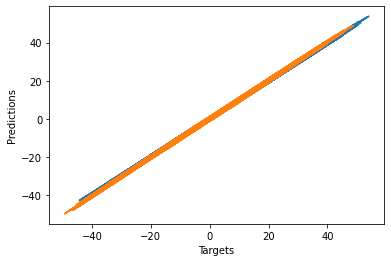

In [8]:
plt.plot(training_data['targets'], model.predict_on_batch(training_data['inputs']))
plt.xlabel('Targets')
plt.ylabel('Predictions')